<a href="https://colab.research.google.com/github/ranjith28100/Weather_Forecasting-SKLEARN/blob/master/Weather_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Importing the libraries*

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Loading the Dataset*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Weather Data.csv to Weather Data.csv


In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Weather Data.csv']))

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
DateTime       3896 non-null object
Condition      3896 non-null object
Rain           3896 non-null float64
MaxTemp        3896 non-null int64
MinTemp        3896 non-null int64
SunRise        3896 non-null object
SunSet         3896 non-null object
MoonRise       3764 non-null object
MoonSet        3765 non-null object
AvgWind        3896 non-null int64
AvgHumidity    3896 non-null int64
AvgPressure    3896 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 365.4+ KB


In [0]:
to_be_removed = ['DateTime','SunRise','SunSet','MoonRise','MoonSet']
data = dataset.drop(to_be_removed,axis =1)

In [22]:
data.head(3)

,Condition,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,Partly cloudy,0.0,27,22,23,66,1012
1,Partly cloudy,0.0,27,22,21,66,1011
2,Patchy rain possible,0.5,26,22,22,63,1015


*Extracting the required features*

In [0]:
data['temperature'] = (dataset['MinTemp']+dataset['MaxTemp'])/2

In [0]:
data.drop(['MinTemp','MaxTemp'],axis =1,inplace =True)

In [25]:
data.describe()

,Rain,AvgWind,AvgHumidity,AvgPressure,temperature
count,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000
mean,0.946794,16.989220,71.414784,1015.281314,15.929543
std,2.558308,7.950417,9.483500,6.284232,7.142182
min,0.000000,2.000000,40.000000,992.000000,-3.500000
25%,0.000000,11.000000,65.000000,1011.000000,10.000000
50%,0.010000,16.000000,71.000000,1015.000000,15.500000
75%,0.720000,22.000000,78.000000,1019.000000,22.500000
max,42.000000,56.000000,97.000000,1038.000000,30.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 6 columns):
Condition      3896 non-null object
Rain           3896 non-null float64
AvgWind        3896 non-null int64
AvgHumidity    3896 non-null int64
AvgPressure    3896 non-null int64
temperature    3896 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 182.8+ KB


In [0]:
dummy_cat = pd.get_dummies(data['Condition'])

In [0]:
del dummy_cat['Torrential rain shower']

In [0]:
del data['Condition']

In [0]:
data = pd.concat([data,dummy_cat],axis =1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 30 columns):
Rain                                   3896 non-null float64
AvgWind                                3896 non-null int64
AvgHumidity                            3896 non-null int64
AvgPressure                            3896 non-null int64
temperature                            3896 non-null float64
Blizzard                               3896 non-null uint8
Cloudy                                 3896 non-null uint8
Fog                                    3896 non-null uint8
Heavy rain                             3896 non-null uint8
Heavy rain at times                    3896 non-null uint8
Light drizzle                          3896 non-null uint8
Light rain                             3896 non-null uint8
Light rain shower                      3896 non-null uint8
Light sleet                            3896 non-null uint8
Light sleet showers                    3896 non-null uint8
Mist

In [0]:
X = data.drop('temperature',axis =1)
y =data['temperature']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

LINEAR REGRESSION MODEL

In [41]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred1 = regressor1.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.42267257043439066

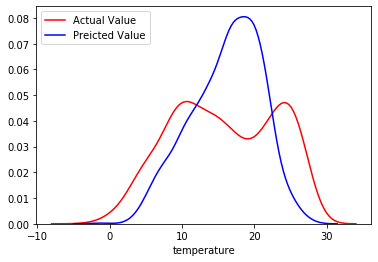

In [47]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred1,color ="b",hist = False,label = "Preicted Value",ax =ax1)

In [0]:
from sklearn.linear_model import Ridge

In [49]:
regressor2 = Ridge()
regressor2.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred2 = regressor2.predict(X_test)

In [52]:
r2_score(y_test,y_pred2)

0.4379645499711582

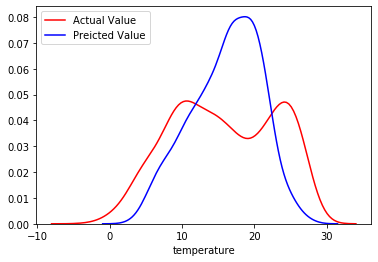

In [53]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred2,color ="b",hist = False,label = "Preicted Value",ax =ax1)

In [54]:
from sklearn.linear_model import Lasso
regressor3 = Lasso()
regressor3.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred3 = regressor3.predict(X_test)

In [56]:
r2_score(y_test,y_pred3)

0.35248036752455736

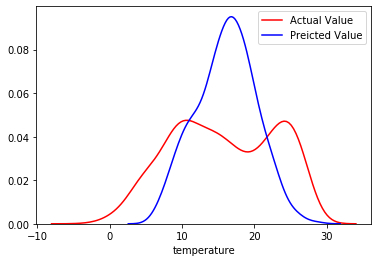

In [74]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred3,color ="b",hist = False,label = "Preicted Value",ax =ax1)

ENSEMBLE MODEL OF LINEAR,RIDGE AND LASSO REGRESSION

In [0]:
y_pred = (y_pred1+y_pred2+y_pred3)/3

In [59]:
r2_score(y_test,y_pred)

0.42263246634609797

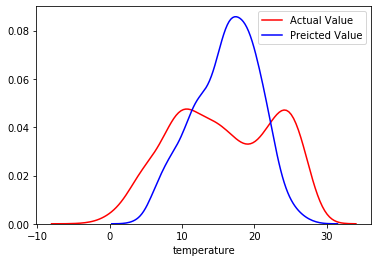

In [61]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

DECISION TREE REGRESSOR

In [62]:
from sklearn.tree import DecisionTreeRegressor as DTC 
regressor4 = DTC()
regressor4.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred4 = regressor4.predict(X_test)

In [64]:
r2_score(y_test,y_pred4)

0.19787012933509374

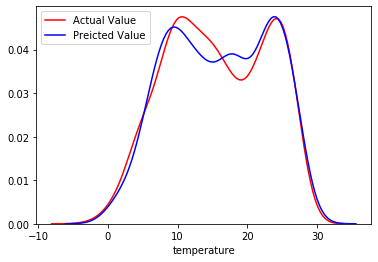

In [73]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred4,color ="b",hist = False,label = "Preicted Value",ax =ax1)

K NEAREST NEIGHBOURS REGRESSOR

In [0]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [67]:
regressor5 = KNN()
regressor5.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
y_pred5 = regressor5.predict(X_test)

In [70]:
r2_score(y_test,y_pred5)

0.4215019973801629

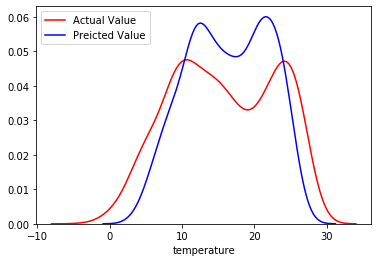

In [72]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred5,color ="b",hist = False,label = "Preicted Value",ax =ax1)

RANDOM FOREST REGRESSOR

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
regressor6 = RandomForestRegressor()
regressor6.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred6 =  regressor6.predict(X_test)

In [78]:
r2_score(y_test,y_pred6)

0.522414290555785

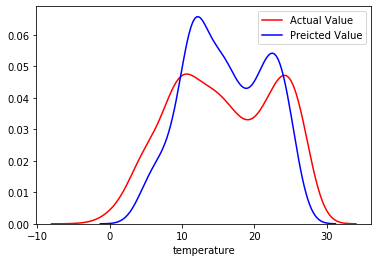

In [80]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred6,color ="b",hist = False,label = "Preicted Value",ax =ax1)

SUPPORT VECTOR REGRESSOR

In [0]:
from sklearn.svm import SVR

In [90]:
regressor7 = SVR()
regressor7.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred7 = regressor7.predict(X_test)

In [92]:
r2_score(y_test,y_pred7)

0.027850072416168548

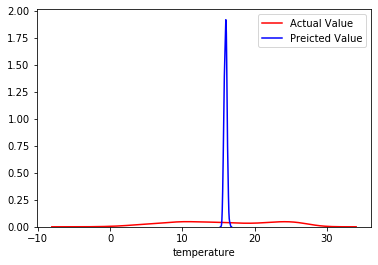

In [93]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred7,color ="b",hist = False,label = "Preicted Value",ax =ax1)